In [17]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta

In [18]:
# Portfolio of major tech stocks
tech_stocks = {
    'AAPL' : 'Apple Inc.',
    'MSFT' : 'Microsoft Corporation',
    'GOOGL' : 'Alphabet Inc.',
    'AMZN' : 'Amazon.com Inc.',
    'NVDA' : 'NVIDIA Corporation',
    'META' : 'Meta Platforms Inc.',
    'TSLA' : 'TESLA Inc.', 
    'NFLX' : 'Netflix Inc.'
}

# Get the data for all of the stocks
end_date = datetime.now()
start_date = end_date - timedelta(days=2*365)

stock_data = {}

for symbol in tech_stocks.keys():
    try:
        data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=True)
        if 'Close' in data:
            stock_data[symbol] = data['Close']
            print(f"Successfully downlaoded data for {symbol} - {tech_stocks[symbol]}")
        else:
            print("No Close data for {symbol}")
    except Exception as e:
        print(f"Error downloading data for {symbol}")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for AAPL - Apple Inc.
Successfully downlaoded data for MSFT - Microsoft Corporation


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for GOOGL - Alphabet Inc.
Successfully downlaoded data for AMZN - Amazon.com Inc.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully downlaoded data for NVDA - NVIDIA Corporation
Successfully downlaoded data for META - Meta Platforms Inc.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Successfully downlaoded data for TSLA - TESLA Inc.
Successfully downlaoded data for NFLX - Netflix Inc.


In [19]:
# Combine the data in one dataframe
portfolio_prices = pd.concat(stock_data, axis=1)
portfolio_prices.columns = list(stock_data.keys())
portfolio_prices.head()

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,NFLX
Date,,,,,,,,
2023-08-11,176.265259,316.094849,128.787598,138.410004,40.829868,299.994263,242.649994,421.660004
2023-08-14,177.920944,319.078461,130.547058,140.570007,43.726089,304.519409,239.759995,427.779999
2023-08-15,175.928162,316.931854,129.006302,137.669998,43.912975,300.302521,232.960007,423.700012
2023-08-16,175.055740,316.162170,127.932747,135.070007,43.459255,292.684296,225.600006,415.450012
2023-08-17,172.507782,312.688782,129.145462,133.979996,43.317341,283.534485,219.220001,403.000000


In [20]:
# Exploratory data analysis
portfolio_prices.describe()

,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,NFLX
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,204.011622,408.137137,160.718254,183.344280,103.661780,511.850563,258.560840,744.978919
std,23.849277,46.549582,20.085460,29.653898,38.296588,129.360575,69.587892,260.099366
min,164.009476,308.011414,121.441673,119.570000,40.304520,281.704498,142.050003,346.190002
25%,183.011028,383.786697,141.506336,166.905003,69.562784,440.938408,208.557503,560.794983
50%,202.745003,411.651688,162.946754,184.739998,113.782101,510.970398,244.320000,677.670013
75%,224.488472,429.464211,175.089939,205.702499,134.380074,599.671188,306.042488,931.490021
max,258.396667,535.640015,205.893341,242.059998,182.699997,776.369995,479.859985,1339.130005


In [21]:
portfolio_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2023-08-11 to 2025-08-08
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    500 non-null    float64
 1   MSFT    500 non-null    float64
 2   GOOGL   500 non-null    float64
 3   AMZN    500 non-null    float64
 4   NVDA    500 non-null    float64
 5   META    500 non-null    float64
 6   TSLA    500 non-null    float64
 7   NFLX    500 non-null    float64
dtypes: float64(8)
memory usage: 35.2 KB


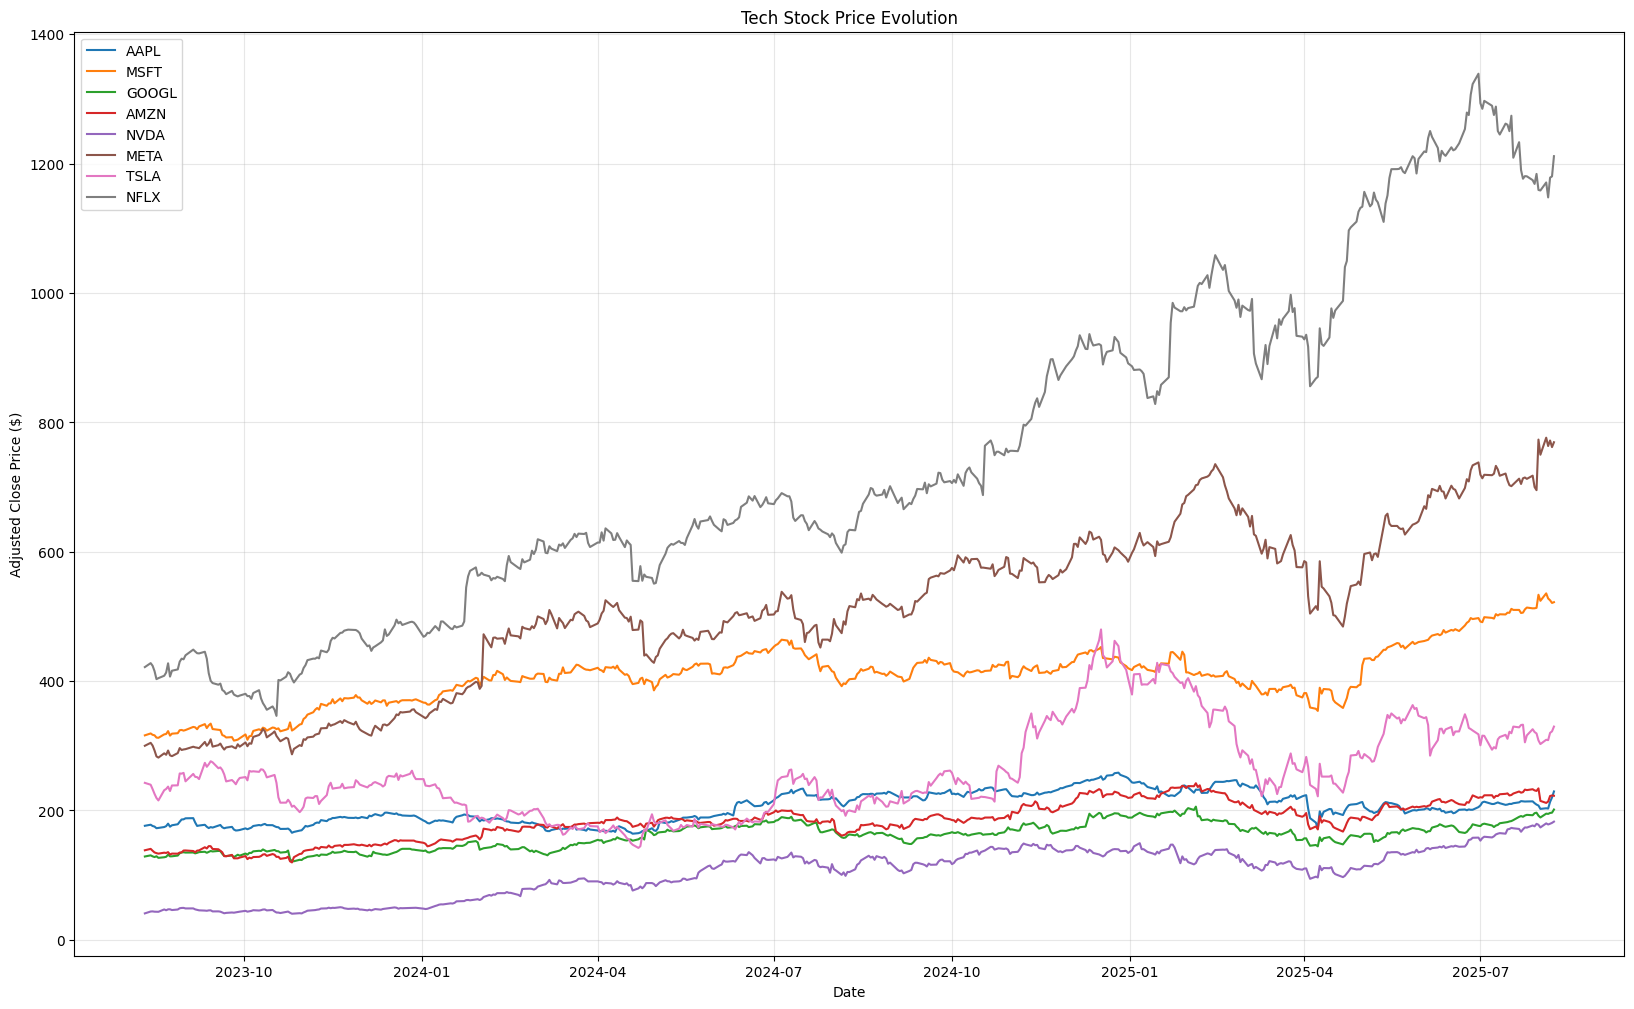

In [22]:
# Basic visualization
plt.figure(figsize=(20,12))
for stock in portfolio_prices.columns:
    plt.plot(portfolio_prices.index, portfolio_prices[stock], label=stock)

plt.title("Tech Stock Price Evolution")
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout
plt.show()



In [23]:
# Return and Risk Analyis
# Calculate daily returns
daily_returns = portfolio_prices.pct_change().dropna()

# Calculate key statistics
return_stats_pct = pd.DataFrame({
    'Mean Daily Return ': daily_returns.mean() * 100,
    'Volatility' : daily_returns.std() * 100,
    'Annualized Return' : daily_returns.mean() *252 * 100,
    'Annualized Volatility': daily_returns.std()*np.sqrt(252) * 100,
    'Min Daily Return' : daily_returns.min()* 100,
    'Max daily Returns' : daily_returns.max()* 100
})

return_stats_pct

,Mean Daily Return,Volatility,Annualized Return,Annualized Volatility,Min Daily Return,Max daily Returns
AAPL,0.067992,1.754682,17.133981,27.854719,-9.245608,15.328847
MSFT,0.110631,1.421572,27.879013,22.566759,-6.180906,10.133680
GOOGL,0.107021,1.862538,26.969318,29.566869,-9.509402,10.224364
AMZN,0.114622,1.966620,28.884859,31.219123,-8.979129,11.977032
NVDA,0.352981,3.241738,88.951212,51.460989,-16.968166,18.722732
META,0.215288,2.325722,54.252570,36.919688,-10.561297,20.317638
TSLA,0.141024,4.023296,35.538132,63.867848,-15.426207,22.689990
NFLX,0.233139,2.087073,58.750930,33.131253,-9.093295,16.054764


In [24]:
# Calculate Sharpe ratio
# Assuming 2 % risk-free rate
risk_free_rate = 0.02
return_stats_pct['Sharpe Ratio'] = (return_stats_pct['Annualized Return'] - risk_free_rate*100) / return_stats_pct['Annualized Volatility']
return_stats_pct.round(2)

,Mean Daily Return,Volatility,Annualized Return,Annualized Volatility,Min Daily Return,Max daily Returns,Sharpe Ratio
AAPL,0.07,1.75,17.13,27.85,-9.25,15.33,0.54
MSFT,0.11,1.42,27.88,22.57,-6.18,10.13,1.15
GOOGL,0.11,1.86,26.97,29.57,-9.51,10.22,0.84
AMZN,0.11,1.97,28.88,31.22,-8.98,11.98,0.86
NVDA,0.35,3.24,88.95,51.46,-16.97,18.72,1.69
META,0.22,2.33,54.25,36.92,-10.56,20.32,1.42
TSLA,0.14,4.02,35.54,63.87,-15.43,22.69,0.53
NFLX,0.23,2.09,58.75,33.13,-9.09,16.05,1.71


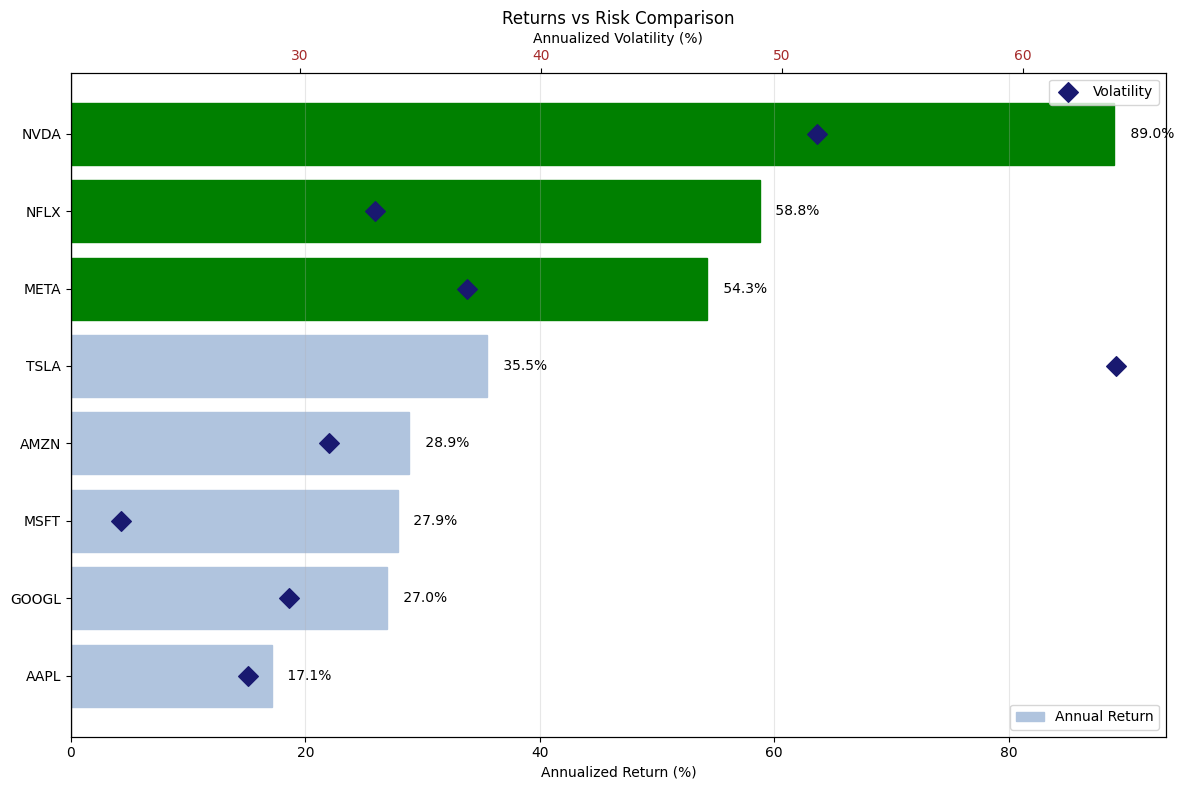

In [25]:
# Visualize risk-return relationships
#  Return Bar Chart with Risk Overlay
fig, ax2 = plt.subplots(figsize=(12,8))
sorted_stocks = return_stats_pct['Annualized Return'].sort_values(ascending=True).index

bars = ax2.barh(range(len(sorted_stocks)),
                return_stats_pct.loc[sorted_stocks, 'Annualized Return'],
                color = 'skyblue',
                edgecolor='black',
                label='Annual Return')

# Color coding
for i, (bar, stock) in enumerate(zip(bars, sorted_stocks)):
    return_val = return_stats_pct.loc[stock, 'Annualized Return']
    if return_val < 0:
        bar.set_color('red')
    elif return_val > 50:
        bar.set_color('green')
    elif return_val > 10:
        bar.set_color('lightsteelblue')
    else:
        bar.set_color('yellow')

    # Add return value as text labels
    ax2.text(return_val + (1 if return_val >= 0 else -1), i, f"{return_val: .1f}%" ,
             va='center', ha='left' if return_val >= 0 else 'right')

# Add volatility on secondary axis as dots
ax3 = ax2.twiny()
ax3.scatter(return_stats_pct.loc[sorted_stocks, 'Annualized Volatility'],
            range(len(sorted_stocks)),
            color= 'midnightblue',
            s =100,
            marker = 'D',
            label = 'Volatility', 
            zorder= 5)

ax2.set_yticks(range(len(sorted_stocks)))
ax2.set_yticklabels(sorted_stocks)
ax2.set_xlabel('Annualized Return (%)')
ax3.set_xlabel('Annualized Volatility (%)')
ax3.tick_params(axis='x', labelcolor='brown')

plt.title('Returns vs Risk Comparison')
ax2.grid(True, alpha=0.3, axis='x')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5, linewidth=1)

# Create combined legend
ax2.legend(loc='lower right')
ax3.legend(loc='upper right')

plt.tight_layout()
plt.show()



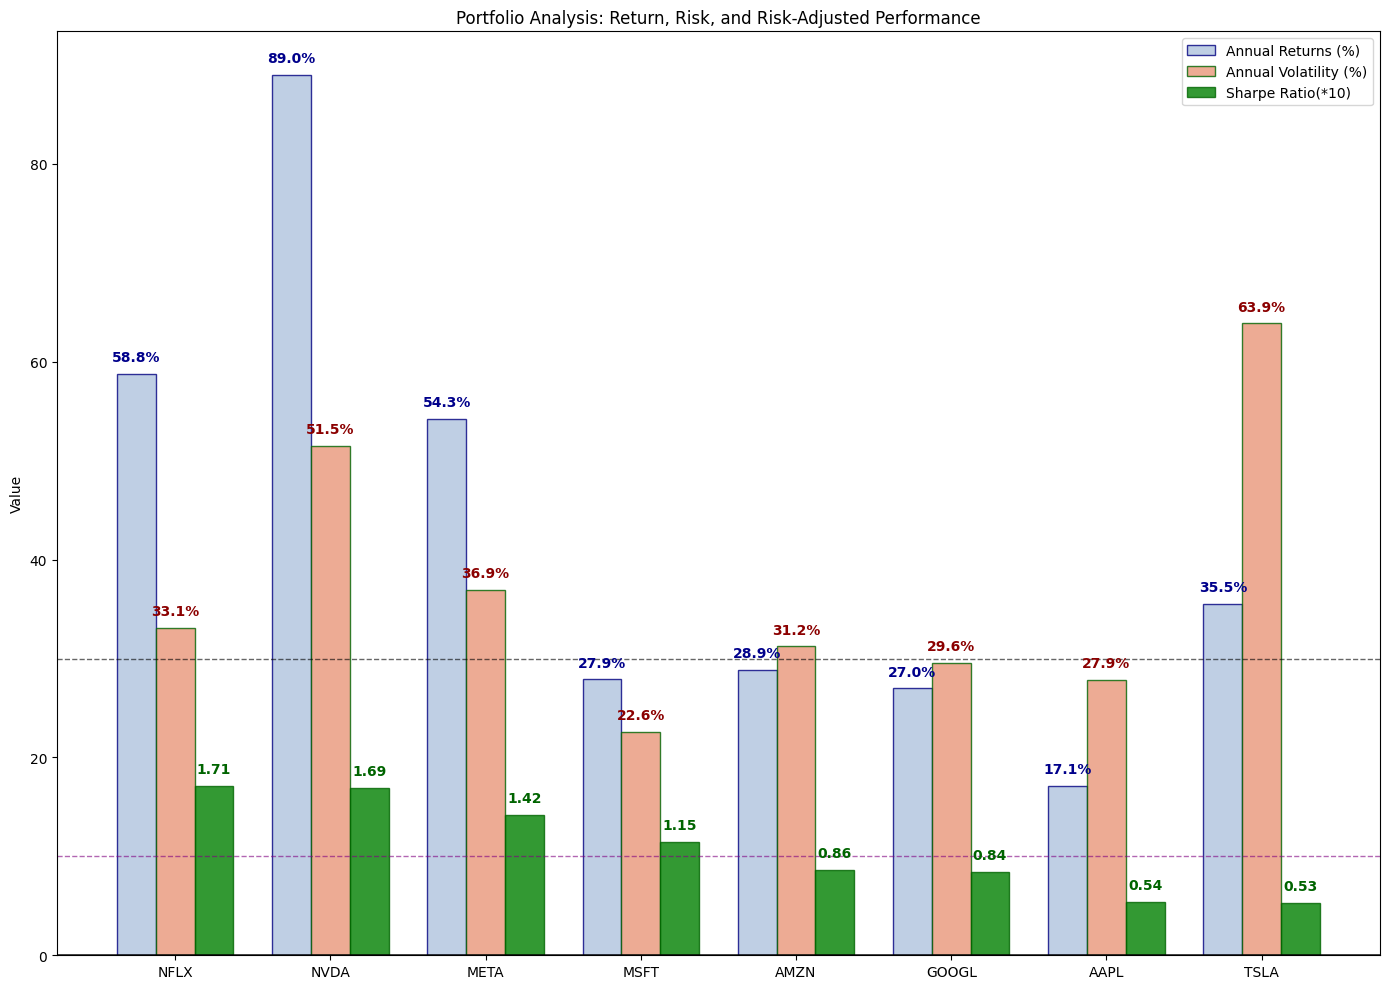

In [26]:
# Visulaize return, risk and risk-adjusted performances
sorted_stats = return_stats_pct.sort_values('Sharpe Ratio', ascending=False)
sorted_stocks = sorted_stats.index

# Create the graph
plt.figure(figsize=(14,10))
ax = plt.gca()

x_positions = np.arange(len(sorted_stocks))
bar_width = 0.25

# Bar chart for annualized return
bars_return = ax.bar(x_positions - bar_width,
                     sorted_stats['Annualized Return'],
                     bar_width,
                     label= 'Annual Returns (%)',
                     color='lightsteelblue',
                     alpha=0.8,
                     edgecolor='navy',
                     linewidth=1)


# Bar chart for annualized volatility
bars_volatility = ax.bar(x_positions,
                         sorted_stats['Annualized Volatility'],
                         bar_width,
                         label= 'Annual Volatility (%)',
                         color='darksalmon',
                         alpha=0.8,
                         edgecolor='darkgreen',
                         linewidth=1)

# Bar chart for Sharpe Ratio
scaled_sharpe = sorted_stats['Sharpe Ratio'] * 10
bars_sharpe = ax.bar(x_positions + bar_width,
                     scaled_sharpe,
                     bar_width,
                     label='Sharpe Ratio(*10)',
                     color='green',
                     alpha=0.8,
                     edgecolor='darkgreen',
                     linewidth=1)


# Add value labels
for i, stock in enumerate(sorted_stocks):
    return_val = sorted_stats.loc[stock, 'Annualized Return']
    volatility_val = sorted_stats.loc[stock, 'Annualized Volatility']
    sharpe_val = sorted_stats.loc[stock, 'Sharpe Ratio']

    if return_val >= 0:
        ax.text(i - bar_width, return_val + 1, f'{return_val:.1f}%', 
                ha='center', va='bottom', fontweight='bold',  color='darkblue')
    else:
        ax.text(i - bar_width, return_val - 1, f'{return_val:.1f}%', 
                ha='center', va='top', fontweight='bold',  color='darkblue')

    ax.text(i, volatility_val + 1, f'{volatility_val:.1f}%', 
            ha='center', va='bottom', fontweight='bold', color='darkred')
    
    ax.text(i + bar_width, (sharpe_val * 10) + 1, f'{sharpe_val:.2f}', 
            ha='center', va='bottom', fontweight='bold', color='darkgreen')
    

ax.set_xticks(x_positions)
ax.set_xticklabels(sorted_stocks)
ax.set_ylabel('Value')
ax.set_title('Portfolio Analysis: Return, Risk, and Risk-Adjusted Performance')

# Add reference lines for context
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=2)  # Zero line
ax.axhline(y=10, color='purple', linestyle='--', alpha=0.6, linewidth=1)  # 10% return benchmark
ax.axhline(y=30, color='black', linestyle='--', alpha=0.6, linewidth=1)  # 30% volatility threshold

ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

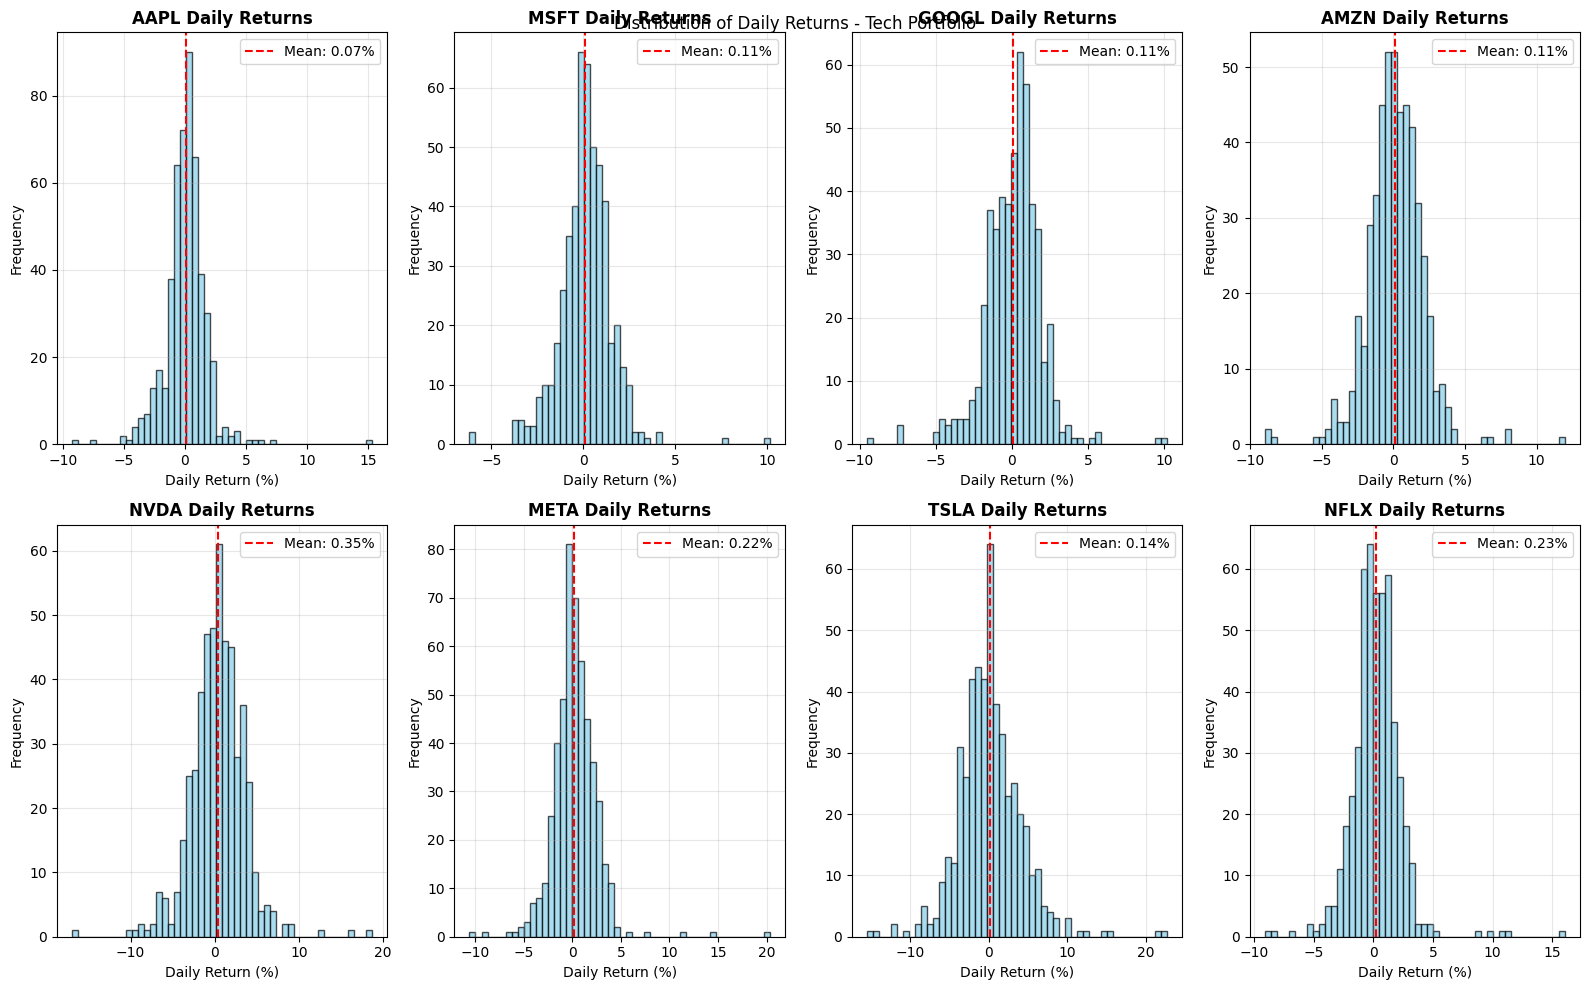

In [27]:
# Distribution of Daily Returns
fig, axes = plt.subplots(2, 4, figsize=(16,10))
axes = axes.flatten()

for i, stock in enumerate(daily_returns.columns):
    axes[i].hist(daily_returns[stock] * 100, bins= 50, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{stock} Daily Returns', fontweight='bold')
    axes[i].set_xlabel('Daily Return (%)')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

    mean_return = daily_returns[stock].mean() * 100
    axes[i].axvline(mean_return, color='red', linestyle='--', 
                   label=f'Mean: {mean_return:.2f}%')
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Distribution of Daily Returns - Tech Portfolio')
plt.show()

In [28]:
# Portfolio Optimization
from scipy.optimize import minimize

expected_returns = daily_returns.mean()*252
cov_matrix = daily_returns.cov()*252
num_assets = len(expected_returns)

# Portfolio functions
def portfolio_return(weights, expected_returns):
    return np.sum(weights*expected_returns)

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    port_return = portfolio_return(weights, expected_returns)
    port_volatility = portfolio_volatility(weights, cov_matrix)
    return (port_return - risk_free_rate)/port_volatility

def negative_sharpe(weights, expected_returns, cov_matrix, risk_free_rate):
    return - portfolio_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate)

#Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0, 0.5) for _ in range(num_assets))

initial_weights = np.array([1/num_assets]* num_assets)

# Optimize the weights to maximize sharpe ratio
optimized_results = minimize(negative_sharpe, initial_weights, 
                          args= (expected_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds= bounds, constraints=constraints)

# Get the optimal weights
optimal_weights = optimized_results.x

In [29]:
# Analyze the Optimal Portfolio
# Analytics of Optimal Portfolio
tickers = list(return_stats_pct.index)
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

print("="*50)

optimal_portfolio_return = portfolio_return(optimal_weights, expected_returns)
optimal_portfolio_volatility = portfolio_volatility(optimal_weights, cov_matrix)
optimal_sharpe_ratio = portfolio_sharpe_ratio(optimal_weights, expected_returns, cov_matrix, risk_free_rate)

print(f"Expected Portfolio Return: {optimal_portfolio_return:.4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:.4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:.4f}")

AAPL: 0.0000
MSFT: 0.0000
GOOGL: 0.0000
AMZN: 0.0000
NVDA: 0.2804
META: 0.2196
TSLA: 0.0000
NFLX: 0.5000
Expected Portfolio Return: 0.6623
Expected Volatility: 0.3110
Sharpe Ratio: 2.0655


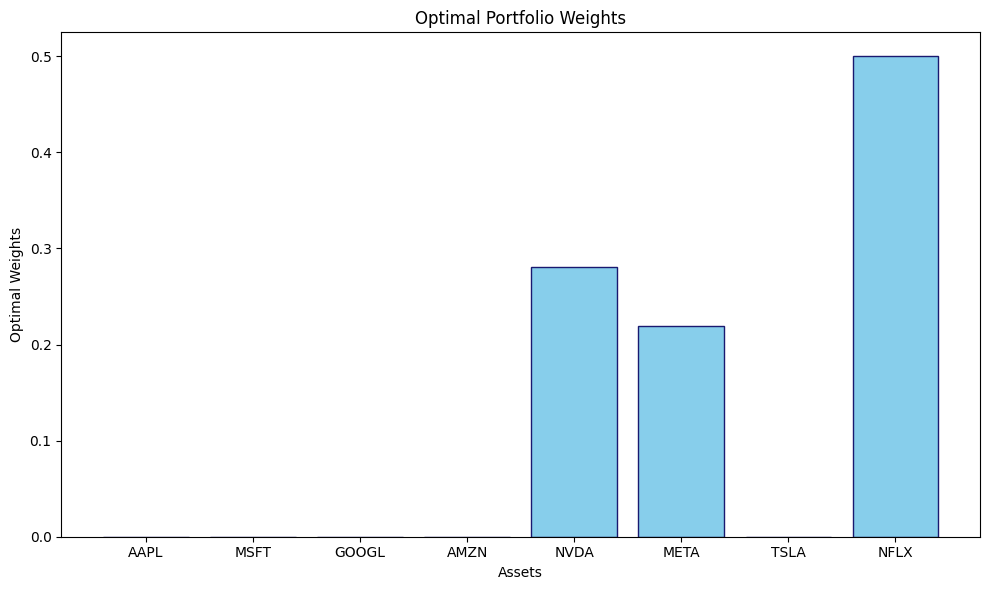

In [30]:
# Visualize the final portfolio

plt.figure(figsize=(10,6))
tickers = list(return_stats_pct.index)
plt.bar(tickers, optimal_weights, color='skyblue', edgecolor='midnightblue')

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')
plt.tight_layout()
plt.show()


In [ ]:


import pandas as pd, numpy as np

assert 'portfolio_prices' in globals()
prices = portfolio_prices.copy()
prices = prices.sort_index()
prices = prices.dropna(how='all', axis=1).dropna(how='any')  

monthly_prices = prices.resample('M').last()
monthly_rets = monthly_prices.pct_change().dropna(how='any')

tickers = list(monthly_rets.columns)
assert len(tickers) >= 2


/var/folders/j2/tt7x49cn16g2zt05h1hk6g040000gn/T/ipykernel_1773/2490729013.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_prices = prices.resample('M').last()
